                                Prediction of store sales

In [3]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import logging

In [13]:
logging.basicConfig(level=logging.INFO, filename='model_training.log', 
                    format='%(asctime)s - %(levelname)s - %(message)s')


In [14]:
#Load the Cleaned Training Data
train_data = pd.read_csv('../data/cleaned_train.csv', low_memory=False)  
print("Data Loaded Successfully!")

Data Loaded Successfully!


In [15]:
# feature Engineering
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data['weekday'] = train_data['Date'].dt.weekday
train_data['weekend'] = (train_data['weekday'] >= 5).astype(int)

train_data['StateHoliday'] = train_data['StateHoliday'].apply(lambda x: 1 if x != '0' else 0)

# Example holiday date (adjust as needed)
train_data['holiday_date'] = pd.to_datetime('2023-12-25')  
train_data['days_to_holiday'] = (train_data['holiday_date'] - train_data['Date']).dt.days
train_data['days_after_holiday'] = (train_data['Date'] - train_data['holiday_date']).dt.days

train_data['beginning_of_month'] = (train_data['Date'].dt.day <= 10).astype(int)
train_data['mid_month'] = ((train_data['Date'].dt.day > 10) & (train_data['Date'].dt.day <= 20)).astype(int)
train_data['end_of_month'] = (train_data['Date'].dt.day > 20).astype(int)

print("Feature Engineering Completed!")

Feature Engineering Completed!


In [16]:
features = ['Promo', 'DayOfWeek', 'days_to_holiday', 
            'days_after_holiday', 'beginning_of_month', 'mid_month', 
            'end_of_month', 'Customers', 'StateHoliday']
X = train_data[features]
y = train_data['Sales']

In [17]:
# Train/Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
logging.info("Split data into training and validation sets.")

In [18]:
#  Create Pipeline

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))  
])

In [19]:
# model training
pipeline.fit(X_train, y_train)
logging.info("Model training completed.")

In [20]:
# Model Evaluation
y_pred = pipeline.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
logging.info("Validation MSE: {}".format(mse))
print(f"Validation MSE: {mse}")

Validation MSE: 2177680.413291396


In [21]:
# Save the model
model_filename = 'random_forest_model_{}.pkl'.format(pd.Timestamp.now().strftime('%Y%m%d_%H%M%S'))
joblib.dump(pipeline, model_filename)
print(f"Model saved as {model_filename}")



Model saved as random_forest_model_20240924_165322.model


In [15]:
# imortance of features
importances = pipeline.named_steps['model'].feature_importances_
features_importance = pd.DataFrame({'feature': features, 'importance': importances})
features_importance.sort_values(by='importance', ascending=False, inplace=True)

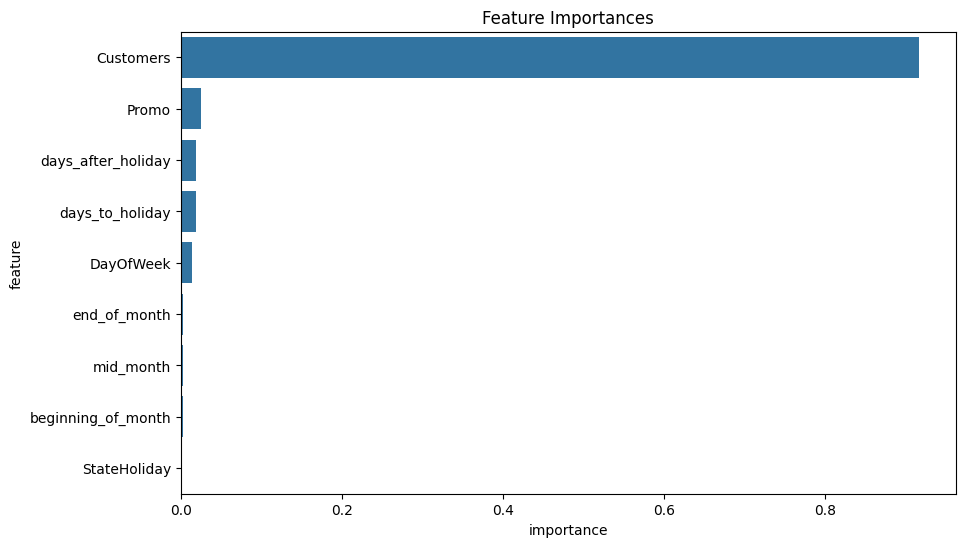

In [16]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=features_importance, x='importance', y='feature')
plt.title('Feature Importances')
plt.show()

                Building a Deep Learning Model with LSTM

In [5]:

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

df=pd.read_csv('../data/cleaned_train.csv', low_memory=False)

# Prepare the data for LSTM
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(df[['Sales']])

# Prepare the dataset for LSTM
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 7  # You can adjust this based on the time window
X, y = create_dataset(scaled_data, look_back)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # Reshape for LSTM

# Build the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(look_back, 1)),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=10, batch_size=64, verbose=1)

# Predict future sales
predicted_sales = model.predict(X)


Epoch 1/10


/home/sa/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15894/15894 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - loss: 0.0193
Epoch 2/10
15894/15894 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - loss: 0.0166
Epoch 3/10
15894/15894 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - loss: 0.0161
Epoch 4/10
15894/15894 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - loss: 0.0153
Epoch 5/10
15894/15894 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - loss: 0.0147
Epoch 6/10
15894/15894 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - loss: 0.0140
Epoch 7/10
15894/15894 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - loss: 0.0134
Epoch 8/10
15894/15894 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - loss: 0.0130
Epoch 9/10
15894/15894 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - loss: 0.0126
Epoch 10/10
15894/15894 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - loss: 0.0123
31788/31788 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step
